In [11]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/Users/vishvajnavin/Desktop/ICRISAT_Weather_1978_to_2018.csv')

# Display the initial columns
print("Initial Columns:", df.columns.tolist())

# Drop unwanted columns
columns_to_remove = ['Station', 'Lat', 'Lon', 'SSH', 'FAO56_ET', 'Cum_Rain']
df_cleaned = df.drop(columns=columns_to_remove)

# Display the cleaned dataset columns
print("Cleaned Columns:", df_cleaned.columns.tolist())

# Display the first few rows of the cleaned dataset
print(df_cleaned.head())

Initial Columns: ['Station', 'Date', 'MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'Rain', 'SSH', 'Evap', 'Radiation', 'FAO56_ET', 'Lat', 'Lon', 'Cum_Rain']
Cleaned Columns: ['Date', 'MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'Rain', 'Evap', 'Radiation']
         Date  MaxT  MinT  RH1   RH2  Wind  Rain  Evap  Radiation
0  1978-01-01  28.5  14.2   68  31.0   5.7   0.0   4.3       18.4
1  1978-01-02  28.8  16.0   79  33.0   6.4   0.0   4.8       16.9
2  1978-01-03  29.0  14.5   86  37.0   5.4   0.0   4.6       15.3
3  1978-01-04  29.0  18.0   89  43.0   7.1   0.0   4.2       16.4
4  1978-01-05  27.8  17.0   81  47.0  10.5   0.0   4.3       15.9


In [12]:
import pandas as pd
# Function to determine weather condition
def determine_weather_condition(row):
    if row['Rain'] > 10:
        return 'Rainy'
    elif row['Wind'] > 20 and row['RH1'] > 80:
        return 'Thunderstorms'
    elif row['RH1'] > 90 and row['MinT'] < 10:
        return 'Foggy'
    elif row['MaxT'] > 30 and row['Rain'] < 5:
        return 'Sunny'
    else:
        return 'Cloudy'

In [13]:
# Apply the function to create a new column for weather conditions
df_cleaned['WeatherCondition'] = df_cleaned.apply(determine_weather_condition, axis=1)
df_cleaned.head()

,Date,MaxT,MinT,RH1,RH2,Wind,Rain,Evap,Radiation,WeatherCondition
0,1978-01-01,28.5,14.2,68,31.0,5.7,0.0,4.3,18.4,Cloudy
1,1978-01-02,28.8,16.0,79,33.0,6.4,0.0,4.8,16.9,Cloudy
2,1978-01-03,29.0,14.5,86,37.0,5.4,0.0,4.6,15.3,Cloudy
3,1978-01-04,29.0,18.0,89,43.0,7.1,0.0,4.2,16.4,Cloudy
4,1978-01-05,27.8,17.0,81,47.0,10.5,0.0,4.3,15.9,Cloudy


In [14]:
df_cleaned.info


<bound method DataFrame.info of              Date  MaxT  MinT  RH1   RH2  Wind  Rain  Evap  Radiation  \
0      1978-01-01  28.5  14.2   68  31.0   5.7   0.0   4.3       18.4   
1      1978-01-02  28.8  16.0   79  33.0   6.4   0.0   4.8       16.9   
2      1978-01-03  29.0  14.5   86  37.0   5.4   0.0   4.6       15.3   
3      1978-01-04  29.0  18.0   89  43.0   7.1   0.0   4.2       16.4   
4      1978-01-05  27.8  17.0   81  47.0  10.5   0.0   4.3       15.9   
...           ...   ...   ...  ...   ...   ...   ...   ...        ...   
14848  2018-08-27  29.5  22.2   93  64.0   9.6   4.5   2.5       12.9   
14849  2018-08-28  29.2  22.6   90  70.0   9.2  13.2   4.7       11.7   
14850  2018-08-29  29.6  22.4   91  63.0   7.6  14.0   3.6       15.0   
14851  2018-08-30  30.6  23.0   87  59.0   8.2   0.0   5.2       19.7   
14852  2018-08-31  30.6  23.0   90  62.0   7.0   0.0   4.9       18.0   

      WeatherCondition  
0               Cloudy  
1               Cloudy  
2               

In [15]:
if df_cleaned['Date'].dtype == 'object':
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])


In [16]:
print("Updated Data Types after conversion:")
print(df_cleaned.dtypes)

Updated Data Types after conversion:
Date                datetime64[ns]
MaxT                       float64
MinT                       float64
RH1                          int64
RH2                        float64
Wind                       float64
Rain                       float64
Evap                       float64
Radiation                  float64
WeatherCondition            object
dtype: object


In [17]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


               Date      MaxT      MinT       RH1       RH2      Wind  \
Date       1.000000  0.041940 -0.050644  0.120580  0.069594 -0.267750   
MaxT       0.041940  1.000000  0.536853 -0.736752 -0.600749  0.129675   
MinT      -0.050644  0.536853  1.000000 -0.328062  0.224721  0.490483   
RH1        0.120580 -0.736752 -0.328062  1.000000  0.604168 -0.115513   
RH2        0.069594 -0.600749  0.224721  0.604168  1.000000  0.214611   
Wind      -0.267750  0.129675  0.490483 -0.115513  0.214611  1.000000   
Rain       0.001730 -0.151575  0.094905  0.207289  0.356194  0.111860   
Evap      -0.126822  0.876416  0.421487 -0.777753 -0.642473  0.315018   
Radiation -0.137612  0.670821  0.133390 -0.546423 -0.688859 -0.054113   

               Rain      Evap  Radiation  
Date       0.001730 -0.126822  -0.137612  
MaxT      -0.151575  0.876416   0.670821  
MinT       0.094905  0.421487   0.133390  
RH1        0.207289 -0.777753  -0.546423  
RH2        0.356194 -0.642473  -0.688859  
Wind       

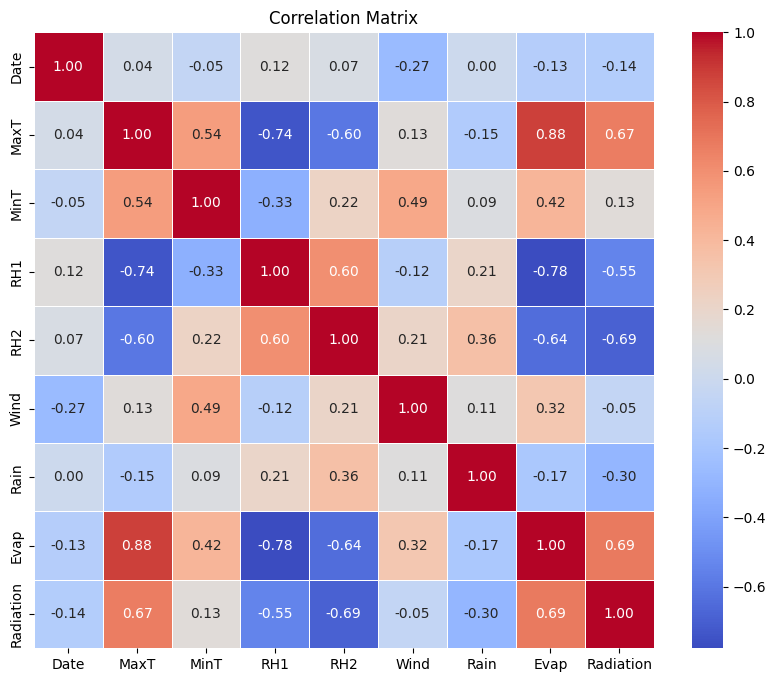

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix, excluding non-numeric columns
correlation_matrix = df_cleaned.drop(columns=['WeatherCondition']).corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: Create a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Calculate CurrentTemp using a weighted average
df_cleaned['CurrentTemp'] = (0.7 * df_cleaned['MaxT'] + 0.3 * df_cleaned['MinT'])

In [20]:
df_cleaned.head

<bound method NDFrame.head of             Date  MaxT  MinT  RH1   RH2  Wind  Rain  Evap  Radiation  \
0     1978-01-01  28.5  14.2   68  31.0   5.7   0.0   4.3       18.4   
1     1978-01-02  28.8  16.0   79  33.0   6.4   0.0   4.8       16.9   
2     1978-01-03  29.0  14.5   86  37.0   5.4   0.0   4.6       15.3   
3     1978-01-04  29.0  18.0   89  43.0   7.1   0.0   4.2       16.4   
4     1978-01-05  27.8  17.0   81  47.0  10.5   0.0   4.3       15.9   
...          ...   ...   ...  ...   ...   ...   ...   ...        ...   
14848 2018-08-27  29.5  22.2   93  64.0   9.6   4.5   2.5       12.9   
14849 2018-08-28  29.2  22.6   90  70.0   9.2  13.2   4.7       11.7   
14850 2018-08-29  29.6  22.4   91  63.0   7.6  14.0   3.6       15.0   
14851 2018-08-30  30.6  23.0   87  59.0   8.2   0.0   5.2       19.7   
14852 2018-08-31  30.6  23.0   90  62.0   7.0   0.0   4.9       18.0   

      WeatherCondition  CurrentTemp  
0               Cloudy        24.21  
1               Cloudy       

In [21]:
df_cleaned['HumidityRatio'] = df_cleaned['RH1'] / df_cleaned['RH2']

In [22]:
df_cleaned.info

<bound method DataFrame.info of             Date  MaxT  MinT  RH1   RH2  Wind  Rain  Evap  Radiation  \
0     1978-01-01  28.5  14.2   68  31.0   5.7   0.0   4.3       18.4   
1     1978-01-02  28.8  16.0   79  33.0   6.4   0.0   4.8       16.9   
2     1978-01-03  29.0  14.5   86  37.0   5.4   0.0   4.6       15.3   
3     1978-01-04  29.0  18.0   89  43.0   7.1   0.0   4.2       16.4   
4     1978-01-05  27.8  17.0   81  47.0  10.5   0.0   4.3       15.9   
...          ...   ...   ...  ...   ...   ...   ...   ...        ...   
14848 2018-08-27  29.5  22.2   93  64.0   9.6   4.5   2.5       12.9   
14849 2018-08-28  29.2  22.6   90  70.0   9.2  13.2   4.7       11.7   
14850 2018-08-29  29.6  22.4   91  63.0   7.6  14.0   3.6       15.0   
14851 2018-08-30  30.6  23.0   87  59.0   8.2   0.0   5.2       19.7   
14852 2018-08-31  30.6  23.0   90  62.0   7.0   0.0   4.9       18.0   

      WeatherCondition  CurrentTemp  HumidityRatio  
0               Cloudy        24.21       2.193548

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14853 entries, 0 to 14852
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              14853 non-null  datetime64[ns]
 1   MaxT              14853 non-null  float64       
 2   MinT              14853 non-null  float64       
 3   RH1               14853 non-null  int64         
 4   RH2               14853 non-null  float64       
 5   Wind              14853 non-null  float64       
 6   Rain              14853 non-null  float64       
 7   Evap              14853 non-null  float64       
 8   Radiation         14852 non-null  float64       
 9   WeatherCondition  14853 non-null  object        
 10  CurrentTemp       14853 non-null  float64       
 11  HumidityRatio     14853 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 1.4+ MB


Date                        datetime64[ns]
MaxT                               float64
MinT                               float64
RH1                                  int64
RH2                                float64
Wind                               float64
Rain                               float64
Evap                               float64
Radiation                          float64
CurrentTemp                        float64
HumidityRatio                      float64
WeatherCondition_encoded             int64
dtype: object
Numeric Columns: ['MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'Rain', 'Evap', 'Radiation', 'CurrentTemp', 'HumidityRatio', 'WeatherCondition_encoded']
                              MaxT      MinT       RH1       RH2      Wind  \
MaxT                      1.000000  0.536853 -0.736752 -0.600749  0.129675   
MinT                      0.536853  1.000000 -0.328062  0.224721  0.490483   
RH1                      -0.736752 -0.328062  1.000000  0.604168 -0.115513   
RH2          

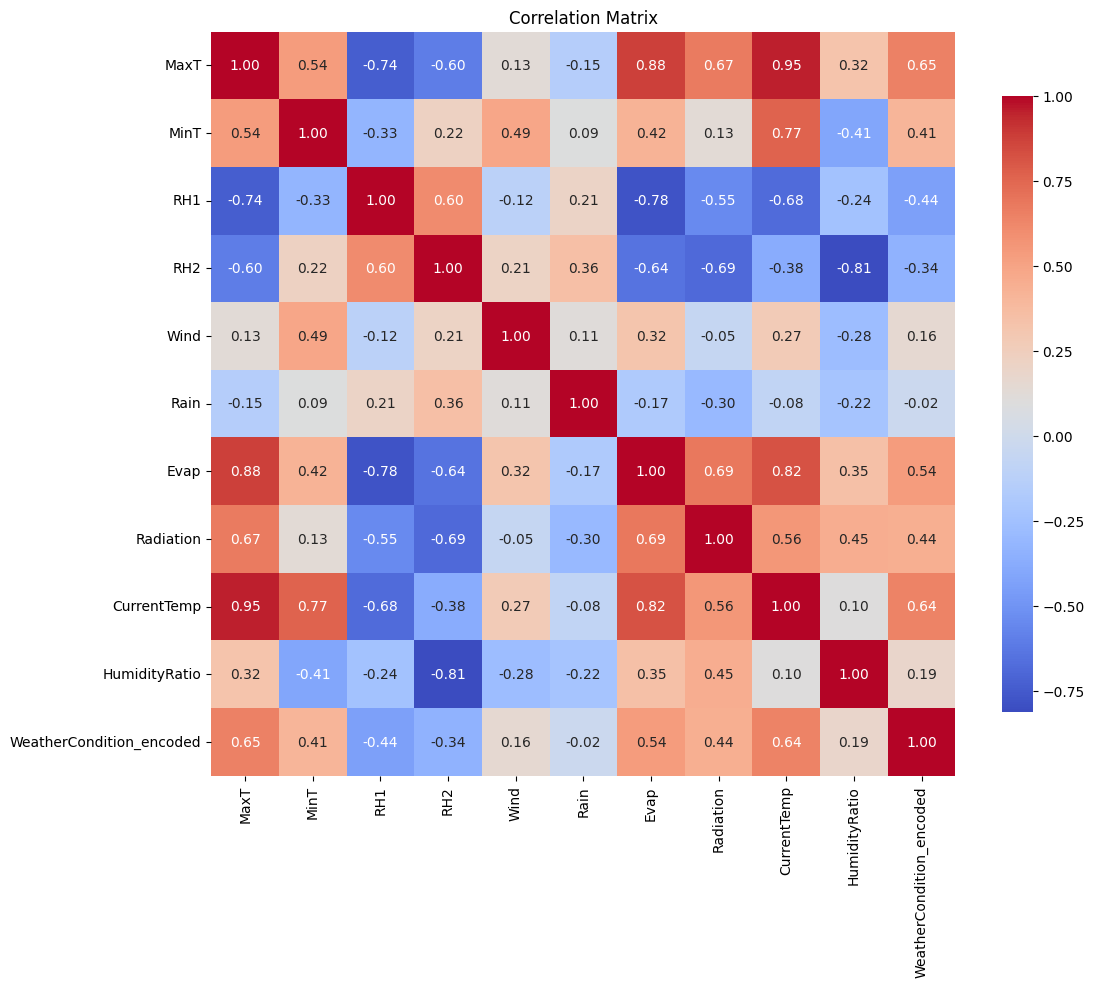

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df_cleaned is your DataFrame

# Step 1: Encode the WeatherCondition
label_encoder = LabelEncoder()
df_cleaned['WeatherCondition_encoded'] = label_encoder.fit_transform(df_cleaned['WeatherCondition'])

# Step 2: Drop the original WeatherCondition column if needed
df_cleaned.drop(columns=['WeatherCondition'], inplace=True)

# Step 3: Check data types of the DataFrame
print(df_cleaned.dtypes)

# Ensure all necessary columns are numeric
# You can explicitly convert columns to numeric if needed
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric Columns:", numeric_columns)

# Step 4: Calculate the correlation matrix
correlation_matrix = df_cleaned[numeric_columns].corr()

# Step 5: Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Create a new feature: Evaporation to Radiation Ratio
df_cleaned['Evap_Radiation_Ratio'] = df_cleaned['Evap'] / df_cleaned['Radiation']

# Check the correlation of the new feature
correlation_matrix_new = df_cleaned.corr()
print(correlation_matrix_new['CurrentTemp'].sort_values(ascending=False))

CurrentTemp                 1.000000
MaxT                        0.953474
Evap                        0.818124
MinT                        0.766222
WeatherCondition_encoded    0.644034
Evap_Radiation_Ratio        0.569499
Radiation                   0.558583
Wind                        0.274032
HumidityRatio               0.101379
Date                        0.013846
Rain                       -0.081533
RH2                        -0.377253
RH1                        -0.678367
Name: CurrentTemp, dtype: float64


In [26]:
df_cleaned['DayOfYear'] = df_cleaned['Date'].dt.dayofyear
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['DayOfWeek'] = df_cleaned['Date'].dt.dayofweek

# Drop the original 'Date' column if not needed anymore
df_cleaned.drop('Date', axis=1, inplace=True)

# Check the first few rows to confirm
print(df_cleaned.head())

   MaxT  MinT  RH1   RH2  Wind  Rain  Evap  Radiation  CurrentTemp  \
0  28.5  14.2   68  31.0   5.7   0.0   4.3       18.4        24.21   
1  28.8  16.0   79  33.0   6.4   0.0   4.8       16.9        24.96   
2  29.0  14.5   86  37.0   5.4   0.0   4.6       15.3        24.65   
3  29.0  18.0   89  43.0   7.1   0.0   4.2       16.4        25.70   
4  27.8  17.0   81  47.0  10.5   0.0   4.3       15.9        24.56   

   HumidityRatio  WeatherCondition_encoded  Evap_Radiation_Ratio  DayOfYear  \
0       2.193548                         0              0.233696          1   
1       2.393939                         0              0.284024          2   
2       2.324324                         0              0.300654          3   
3       2.069767                         0              0.256098          4   
4       1.723404                         0              0.270440          5   

   Month  DayOfWeek  
0      1          6  
1      1          0  
2      1          1  
3      1        

In [27]:
# List of columns to keep
columns_to_keep = ['Rain', 'Wind', 'CurrentTemp', 'HumidityRatio', 
                   'Evap_Radiation_Ratio', 'DayOfYear', 'Month', 
                   'DayOfWeek', 'WeatherCondition_encoded']

# Create a new DataFrame with only the necessary columns
df_reduced = df_cleaned[columns_to_keep]

# Check the resulting DataFrame
print(df_reduced.head())

   Rain  Wind  CurrentTemp  HumidityRatio  Evap_Radiation_Ratio  DayOfYear  \
0   0.0   5.7        24.21       2.193548              0.233696          1   
1   0.0   6.4        24.96       2.393939              0.284024          2   
2   0.0   5.4        24.65       2.324324              0.300654          3   
3   0.0   7.1        25.70       2.069767              0.256098          4   
4   0.0  10.5        24.56       1.723404              0.270440          5   

   Month  DayOfWeek  WeatherCondition_encoded  
0      1          6                         0  
1      1          0                         0  
2      1          1                         0  
3      1          2                         0  
4      1          3                         0  


In [28]:
# Define input features (X) and target variable (y)
X = df_reduced.drop('WeatherCondition_encoded', axis=1)  # Input features
y = df_reduced['WeatherCondition_encoded']  # Target variable

In [29]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting splits
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (11882, 8)
Testing set size: (2971, 8)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
from sklearn.impute import SimpleImputer

# Create an imputer for the missing values
imputer = SimpleImputer(strategy='mean')  # or choose another strategy like median, most_frequent, etc.

# Fit the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Now, transform the test data
X_test_imputed = imputer.transform(X_test)

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree Regressor
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_imputed)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")

Decision Tree Mean Squared Error: 0.5597441938741164
Decision Tree R-squared: 0.7169829164620747


In [33]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_imputed)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest Mean Squared Error: 0.3127256815886907
Random Forest R-squared: 0.8418800742923904


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Fit the model to the training data
gb_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_imputed)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting R-squared: {r2_gb}")

Gradient Boosting Mean Squared Error: 0.3462806804873249
Gradient Boosting R-squared: 0.8249140422542885


In [35]:
from sklearn.svm import SVR

# Create a Support Vector Regressor
svr_model = SVR()

# Fit the model to the training data
svr_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_imputed)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regressor Mean Squared Error: {mse_svr}")
print(f"Support Vector Regressor R-squared: {r2_svr}")

Support Vector Regressor Mean Squared Error: 1.2586135650872192
Support Vector Regressor R-squared: 0.36362155357637316


In [36]:
pip install joblib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import joblib

# Save Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save Gradient Boosting model
joblib.dump(gb_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_imputed)
y_pred_gb = gb_model.predict(X_test_imputed)

# Calculate RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

# Calculate RMSE for Gradient Boosting
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Gradient Boosting RMSE: {rmse_gb}")

Random Forest RMSE: 0.5592188136934332
Gradient Boosting RMSE: 0.5884561839995608


In [39]:
# Assuming you already have your imputed data
# X_imputed refers to your features after handling missing values
# y refers to your target variable

from sklearn.model_selection import cross_val_score
import numpy as np

num_folds = 5  # Define the number of folds for cross-validation

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train_imputed, y_train, cv=num_folds, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_cv_scores)  # Convert to RMSE
print(f"Random Forest RMSE (Cross-Validation): {rf_rmse_scores.mean()} ± {rf_rmse_scores.std()}")

# Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gb_model, X_train_imputed, y_train, cv=num_folds, scoring='neg_mean_squared_error')
gb_rmse_scores = np.sqrt(-gb_cv_scores)  # Convert to RMSE
print(f"Gradient Boosting RMSE (Cross-Validation): {gb_rmse_scores.mean()} ± {gb_rmse_scores.std()}")

Random Forest RMSE (Cross-Validation): 0.5594580356091955 ± 0.011903254213616168
Gradient Boosting RMSE (Cross-Validation): 0.5905959098756954 ± 0.01366692315904472


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter combinations to try
    cv=5,        # 5-fold cross-validation
    verbose=2,   # Show progress
    n_jobs=-1,   # Use all cores
    scoring='neg_mean_squared_error'
)

# Fit the random search model
random_search.fit(X_train_imputed, y_train)

# Output the best parameters and the best model
print("Best Parameters from Randomized Search: ", random_search.best_params_)

# You can now use the best estimator
best_rf_model = random_search.best_estimator_

# Evaluate the tuned model on the test set
from sklearn.metrics import mean_squared_error

y_pred = best_rf_model.predict(X_test_imputed)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Random Forest RMSE after fine-tuning: {rmse}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters from Randomized Search:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}
Random Forest RMSE after fine-tuning: 0.5539156211409791


/Users/vishvajnavin/ml/my_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
import joblib

# Save the best model to a file
joblib.dump(best_rf_model, 'random_forest_model.pkl')

print("Best model saved as 'random_forest_model.pkl'.")

Best model saved as 'random_forest_model.pkl'.


In [42]:
import joblib

# Load the best model from the file
loaded_rf_model = joblib.load('random_forest_model.pkl')
print("Best model loaded successfully.")

Best model loaded successfully.


In [43]:
# Make predictions on the test set
y_pred_test = loaded_rf_model.predict(X_test_imputed)

# Output predictions
print("Predictions on the test set:", y_pred_test)

Predictions on the test set: [2.98083333 1.65754762 2.97119048 ... 3.         0.09194643 0.33777183]


In [44]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Random Forest RMSE on Test Set: {rmse_test}")

Random Forest RMSE on Test Set: 0.5539156211409791


/Users/vishvajnavin/ml/my_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
pip install tk

  Using cached tk-0.1.0-py3-none-any.whl.metadata (693 bytes)
Using cached tk-0.1.0-py3-none-any.whl (3.9 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
import joblib

# Save the model in the current working directory
joblib.dump(best_rf_model, 'best_rf_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [47]:
import joblib

# Load the model from the current working directory
best_rf_model = joblib.load('best_rf_model.pkl')
print("Model loaded successfully!")

Model loaded successfully!


In [48]:
# Assuming your modified DataFrame is called df_processed
df_processed.to_csv('/Users/vishvajnavin/Desktop/W Prediction/data/processed_ICRISAT_Weather.csv', index=False)

NameError: name 'df_processed' is not defined

[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   6.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  10.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   6.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  10.1s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   8.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   7.2s
[CV] END bootstrap=False, max_depth=20, max

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [53]:
import pandas as pd

# Assuming you have a DataFrame called df with a 'Date' column
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if it's not already

# Extract year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column if it's no longer needed
df = df.drop(columns=['Date'])

In [55]:
print(df.columns)

Index(['Station', 'MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'Rain', 'SSH', 'Evap',
       'Radiation', 'FAO56_ET', 'Lat', 'Lon', 'Cum_Rain', 'Year', 'Month',
       'Day'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Assuming df_imputed is your preprocessed DataFrame
X = df_imputed[['MaxT', 'MinT', 'Year', 'Month', 'Wind']]  # Your feature variables
y = df_imputed['WeatherCondition_encoded']  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# Fit the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Save the fitted models
from joblib import dump
dump(rf_model, 'random_forest_model.joblib')
dump(gb_model, 'gradient_boosting_model.joblib')

In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from joblib import load

# Load your trained models
rf_model = load('random_forest_model.joblib')
gb_model = load('gradient_boosting_model.joblib')

# Function to make predictions
def predict_weather():
    try:
        # Get user inputs
        max_temp = float(max_temp_entry.get())
        min_temp = float(min_temp_entry.get())
        wind = float(wind_entry.get())
        year = int(year_entry.get())
        month = int(month_entry.get())
        
        # Prepare input for model
        input_data = pd.DataFrame({
            'MaxT': [max_temp],
            'MinT': [min_temp],
            'Wind': [wind],
            'Year': [year],
            'Month': [month]
        })

        # Make predictions
        rf_prediction = rf_model.predict(input_data)[0]
        gb_prediction = gb_model.predict(input_data)[0]

        # Display results
        result_text = f"Random Forest Prediction: {rf_prediction}\nGradient Boosting Prediction: {gb_prediction}"
        messagebox.showinfo("Prediction Results", result_text)

    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create GUI window
window = tk.Tk()
window.title("Weather Prediction")

# Create and place labels and entries
tk.Label(window, text="Max Temperature:").grid(row=0, column=0)
max_temp_entry = tk.Entry(window)
max_temp_entry.grid(row=0, column=1)

tk.Label(window, text="Min Temperature:").grid(row=1, column=0)
min_temp_entry = tk.Entry(window)
min_temp_entry.grid(row=1, column=1)

tk.Label(window, text="Wind Speed:").grid(row=2, column=0)
wind_entry = tk.Entry(window)
wind_entry.grid(row=2, column=1)

tk.Label(window, text="Year:").grid(row=3, column=0)
year_entry = tk.Entry(window)
year_entry.grid(row=3, column=1)

tk.Label(window, text="Month:").grid(row=4, column=0)
month_entry = tk.Entry(window)
month_entry.grid(row=4, column=1)

# Create a button to predict
predict_button = tk.Button(window, text="Predict", command=predict_weather)
predict_button.grid(row=5, columnspan=2)

# Run the GUI
window.mainloop()


In [ ]:
from joblib import dump

# Assuming rf_model and gb_model are your trained models
dump(rf_model, 'random_forest_model.joblib')
dump(gb_model, 'gradient_boosting_model.joblib')